Кобзарь О.С. Хабибуллин Р.А. 2019 г.

# Инклинометрия и конструкция скважин

In [1]:
import sys
sys.path.append('../')

import uniflocpy.uWell.deviation_survey as dev_sev
import uniflocpy.uTools.data_workflow as utool
import uniflocpy.uWell.uPipe as Pipe
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import tools
import pandas as pd
init_notebook_mode(connected=True)
import scipy.interpolate as interpolate
import matplotlib.pyplot as plt

In [2]:
path_to_file = './data/Инклинометрия 2196 нп.xls'

wds =dev_sev.well_deviation_survey()

wds.load_deviation_survey(path_to_file)

wds.change_str_to_float()

wds.interpolate_all()

In [3]:
x = wds.deviation_survey_dataframe['Координата Х (инклинометрия)']
y = wds.deviation_survey_dataframe['Координата Y (инклинометрия)']
z = wds.deviation_survey_dataframe['Вертикальная отметка'] * (-1)  # перевод в альтитуду
trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    marker=dict(
        size=4,
        color=z,
        colorscale='Viridis',
    )
    )

data = [trace1]


layout = dict(title = '3D профиль скважины',  yaxis=dict(autorange='reversed'))
fig = dict(data=data, layout=layout)
iplot(fig, filename='simple-3d-scatter')

In [16]:
simple_dev_sev = dev_sev.simple_well_deviation_survey()
simple_dev_sev.calc_all()

In [23]:
trace1 = go.Scatter3d(
    x=simple_dev_sev.x_displacement_m,
    y=simple_dev_sev.y_displacement_m,
    z=simple_dev_sev.h_vert_m * (-1),  # перевод в альтитуду,
    marker=dict(
        size=4,
        color=z,
        colorscale='Viridis',
    ),
    name = 'Построенный профиль',
    )

trace2 = go.Scatter3d(
    x=[0,0],
    y=[0,0],
    z=[-500, -250],
    marker = dict(
        size=4
    ),
    name = 'Исходные точки',
    )

data = [trace1, trace2]


layout = dict(title = '3D профиль простой скважины',  yaxis=dict(autorange='reversed'))
fig = dict(data=data, layout=layout)
iplot(fig, filename='simple-3d-scatter')

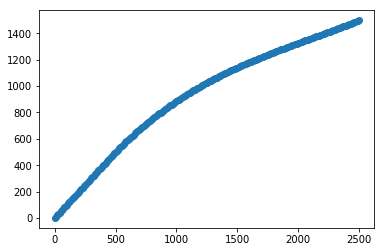

In [18]:
plt.plot(simple_dev_sev.h_mes_m,simple_dev_sev.h_vert_m , 'o')
plt.show()

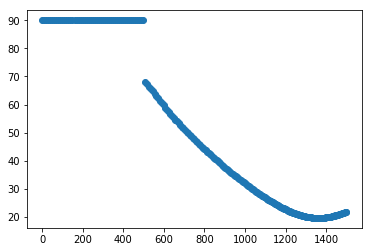

In [19]:
plt.plot(simple_dev_sev.h_vert_m,simple_dev_sev.angle_from_vert_grad, 'o')
plt.show()

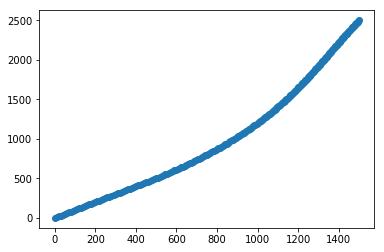

In [20]:
plt.plot(simple_dev_sev.h_vert_m,simple_dev_sev.h_mes_m, 'o')
plt.show()

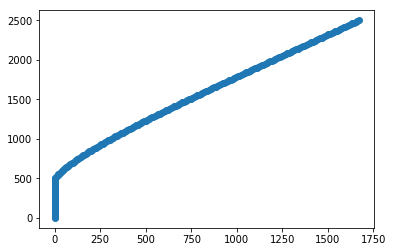

In [24]:
plt.plot(simple_dev_sev.x_displacement_m,simple_dev_sev.h_mes_m, 'o')
plt.show()